In [77]:
#importing required packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import tweepy

In [18]:
#Intializing Google Trend Request
pytrends = TrendReq(hl='en-US', tz=360)

In [53]:
#Inputing the required keywords (in our case we will be going with fashion related keywords)
kw_list = ["jeans", "khakis", "sweaters", "fashion accessories","fashion"]

In [54]:
#fetching the payload
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='US', gprop='')

In [68]:
trends_data = pytrends.interest_over_time().reset_index()

In [56]:
type(trends_data)

pandas.core.frame.DataFrame

In [58]:
trends_data.dtypes

date                   datetime64[ns]
jeans                           int32
khakis                          int32
sweaters                        int32
fashion accessories             int32
fashion                         int32
isPartial                        bool
dtype: object

In [27]:
trends_data.head()

,date,jeans,khakis,sweaters,fashion accessories,isPartial
0,2023-09-24,72,1,7,0,False
1,2023-10-01,71,1,7,0,False
2,2023-10-08,77,1,9,0,False
3,2023-10-15,79,1,10,0,False
4,2023-10-22,72,1,9,0,False


In [28]:
trends_data['date'].unique

<bound method Series.unique of 0    2023-09-24
1    2023-10-01
2    2023-10-08
3    2023-10-15
4    2023-10-22
5    2023-10-29
6    2023-11-05
7    2023-11-12
8    2023-11-19
9    2023-11-26
10   2023-12-03
11   2023-12-10
12   2023-12-17
13   2023-12-24
14   2023-12-31
15   2024-01-07
16   2024-01-14
17   2024-01-21
18   2024-01-28
19   2024-02-04
20   2024-02-11
21   2024-02-18
22   2024-02-25
23   2024-03-03
24   2024-03-10
25   2024-03-17
26   2024-03-24
27   2024-03-31
28   2024-04-07
29   2024-04-14
30   2024-04-21
31   2024-04-28
32   2024-05-05
33   2024-05-12
34   2024-05-19
35   2024-05-26
36   2024-06-02
37   2024-06-09
38   2024-06-16
39   2024-06-23
40   2024-06-30
41   2024-07-07
42   2024-07-14
43   2024-07-21
44   2024-07-28
45   2024-08-04
46   2024-08-11
47   2024-08-18
48   2024-08-25
49   2024-09-01
50   2024-09-08
51   2024-09-15
52   2024-09-22
53   2024-09-29
Name: date, dtype: datetime64[ns]>

In [29]:
trends_data.shape

(54, 6)

In [75]:
pytrends.top_charts(2023, hl='en-US', tz=300, geo='US')

,title,exploreQuery
0,War in Israel and Gaza,Israel Gaza
1,Titanic submarine,
2,Hurricane Hilary,
3,Hurricane Idalia,
4,Hurricane Lee,
5,Maine shooting,
6,Nashville shooting,
7,Maui fire,
8,Idaho murder trial,
9,Canada wildfires,


## Search Frequency of Items Over Time

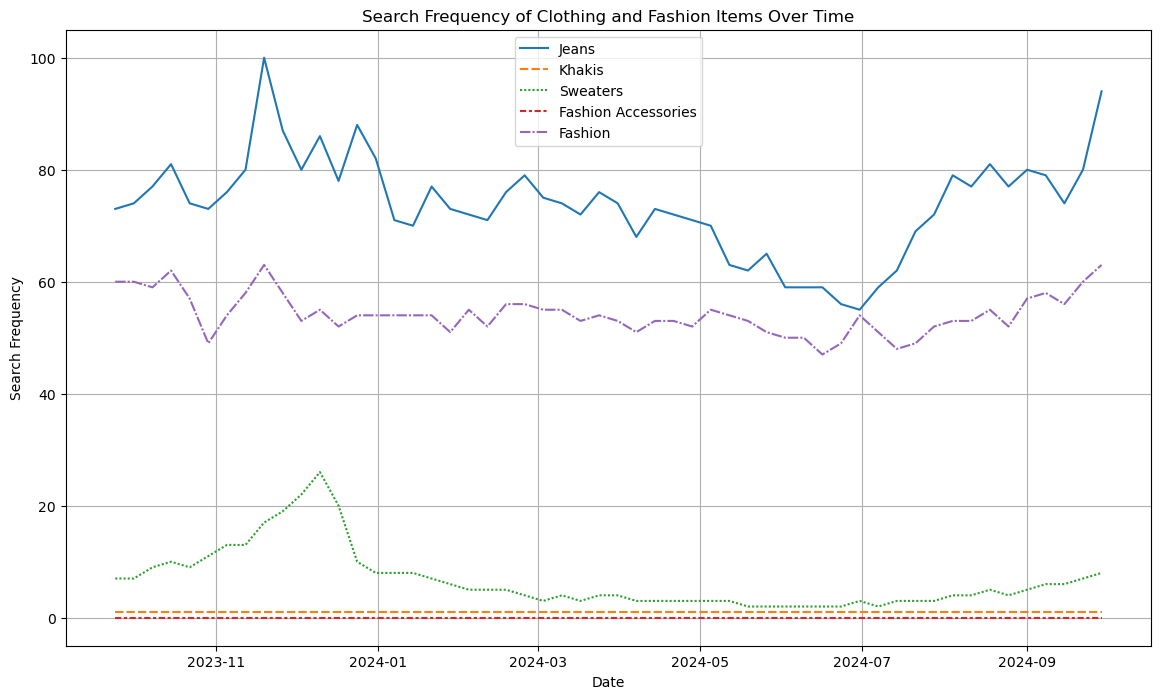

In [69]:
trends_data['date'] = pd.to_datetime(trends_data['date'])

# Set the date as the index (helps with time series plotting)
trends_data.set_index('date', inplace=True)

# Plot search frequency over time for different terms
plt.figure(figsize=(14, 8))
sns.lineplot(data=trends_data[['jeans', 'khakis', 'sweaters', 'fashion accessories', 'fashion']])
plt.title('Search Frequency of Clothing and Fashion Items Over Time')
plt.xlabel('Date')
plt.ylabel('Search Frequency')
plt.legend(labels=['Jeans', 'Khakis', 'Sweaters', 'Fashion Accessories', 'Fashion'])
plt.grid(True)
plt.show()

## Most Searched Terms Throughout the Year

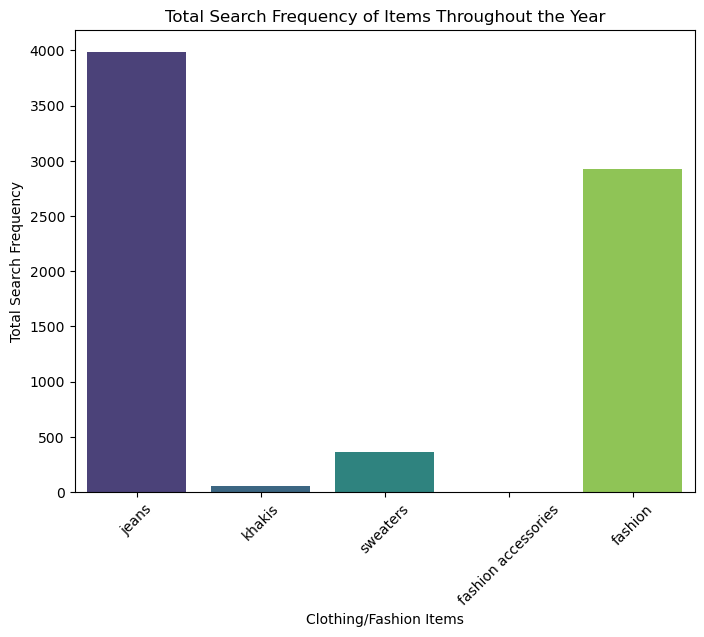

In [70]:
# Sum the values for each column to get total searches throughout the year
total_searches = trends_data[['jeans', 'khakis', 'sweaters', 'fashion accessories', 'fashion']].sum()

# Plot total searches for each item
plt.figure(figsize=(8, 6))
sns.barplot(x=total_searches.index, y=total_searches.values, palette='viridis')
plt.title('Total Search Frequency of Items Throughout the Year')
plt.xlabel('Clothing/Fashion Items')
plt.ylabel('Total Search Frequency')
plt.xticks(rotation=45)
plt.show()